# Bee Hives Metrics

## Overview

1. Problem Statements
2. Data Exploration
3. Plots

### 1. Problem Statement

Calculate the average value for weight, flow, humidity, and temperature over a year.
Create a table and then plot these values

In [1]:
# load packages

In [2]:
install.packages("ggplot2")
install.packages("dplyr")
library(ggplot2)
library(dplyr)
install.packages("lubridate")
library(lubridate)
install.packages("plotly")
library(plotly)
install.packages("ggthemes")
library(ggthemes)

Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\Rtmp6DxCqq\downloaded_packages


Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\Rtmp6DxCqq\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 4.0.2"
Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\Rtmp6DxCqq\downloaded_packages


Warning message:
"package 'lubridate' was built under R version 4.0.2"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\Rtmp6DxCqq\downloaded_packages


Warning message:
"package 'plotly' was built under R version 4.0.2"

Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\Rtmp6DxCqq\downloaded_packages


Warning message:
"package 'ggthemes' was built under R version 4.0.2"


### 2. Data Exploration
This data is sourced from HOBOS . https://www.hobos.de &
https://www.kaggle.com/se18m502/bee-hive-metrics

#### flow_2017.csv : 
For a date it contains the number of departures and arrivals from/to the beehive. 
A positive number indicates the number of arrivals and a negative number of departures. 
Note that this 2 values are in the data set with the same timestamp.
#### humidity_2017.csv : 
Level of humidity through time of the beehive expressed in %
#### temperature_2017.csv : 
Temperature of the beehive through time of the beehive in Cº obtained from 13 sensors.
#### weight_2017.csv : 
Weight of the beehive through time in Kg.


In [3]:
# load the data
flow <- read.csv("flow_2017.csv", header = TRUE)
hum <- read.csv("humidity_2017.csv", header = TRUE)
temp <- read.csv("temperature_2017.csv", header = TRUE)
weight <- read.csv("weight_2017.csv", header = TRUE)

In [4]:
# timestamp from chr to as.POSIXct
flow$timestamp <- as.POSIXct(flow$timestamp, format = "%Y-%m-%d %H:%M")
hum$timestamp <- as.POSIXct(hum$timestamp, format = "%Y-%m-%d %H:%M")
temp$timestamp <- as.POSIXct(temp$timestamp, format = "%Y-%m-%d %H:%M")
weight$timestamp <- as.POSIXct(weight$timestamp, format = "%Y-%m-%d %H:%M")
flow
hum
temp
weight

timestamp,flow
<dttm>,<int>
2017-01-01 05:15:00,0
2017-01-01 05:16:00,0
2017-01-01 05:17:00,0
2017-01-01 05:18:00,0
2017-01-01 05:19:00,0
2017-01-01 05:20:00,0
2017-01-01 05:21:00,0
2017-01-01 05:22:00,0
2017-01-01 05:23:00,0


timestamp,humidity
<dttm>,<dbl>
2017-01-01 05:00:00,92.40667
2017-01-01 06:00:00,92.27000
2017-01-01 07:00:00,92.57500
2017-01-01 08:00:00,92.84000
2017-01-01 09:00:00,93.64000
2017-01-01 10:00:00,93.76833
2017-01-01 11:00:00,92.95000
2017-01-01 12:00:00,92.08000
2017-01-01 13:00:00,91.35667


timestamp,temperature
<dttm>,<dbl>
2017-01-01 05:00:00,-1.91124444
2017-01-01 06:00:00,-1.86671667
2017-01-01 07:00:00,-2.07783333
2017-01-01 08:00:00,-2.32716667
2017-01-01 09:00:00,-2.79123333
2017-01-01 10:00:00,-2.85741667
2017-01-01 11:00:00,-2.32680000
2017-01-01 12:00:00,-1.76161667
2017-01-01 13:00:00,-1.19758333


timestamp,weight
<dttm>,<dbl>
2017-01-01 05:15:00,52.6974
2017-01-01 05:16:00,52.6974
2017-01-01 05:17:00,52.6974
2017-01-01 05:18:00,52.6974
2017-01-01 05:19:00,52.6973
2017-01-01 05:20:00,52.6973
2017-01-01 05:21:00,52.6973
2017-01-01 05:22:00,52.6973
2017-01-01 05:23:00,52.6973


In [5]:
# find the count of duplicates
sum(table(weight$timestamp)-1)
sum(table(flow$timestamp)-1)
sum(table(hum$timestamp)-1)
sum(table(temp$timestamp)-1)

# different way
#sum(duplicated(flow$timestamp))

# flow = 526110, temp = 297013, hum = 1, weight = 60

[1] 60

[1] 524110

[1] 1

[1] 297013

In [6]:
# merging data in data frames and display data frame
mer_data <- merge(flow, hum, by = "timestamp")
merr_data <- merge(mer_data, temp, by = "timestamp")
merrr_data <- merge(merr_data, weight, by = "timestamp")
merrr_data

timestamp,flow,humidity,temperature,weight
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2017-01-01 06:00:00,0,92.270,2.162150,52.6972
2017-01-01 06:00:00,0,92.270,2.770200,52.6972
2017-01-01 06:00:00,0,92.270,-3.370600,52.6972
2017-01-01 06:00:00,0,92.270,3.013883,52.6972
2017-01-01 06:00:00,0,92.270,3.352567,52.6972
2017-01-01 06:00:00,0,92.270,4.495117,52.6972
2017-01-01 06:00:00,0,92.270,1.102850,52.6972
2017-01-01 06:00:00,0,92.270,-2.588800,52.6972
2017-01-01 06:00:00,0,92.270,-1.866717,52.6972


### 3. Plot

Warning message:
"Removed 331200 row(s) containing missing values (geom_path)."
Warning message:
"Removed 331200 row(s) containing missing values (geom_path)."
Warning message:
"Removed 331200 row(s) containing missing values (geom_path)."
Warning message:
"Removed 331200 row(s) containing missing values (geom_path)."


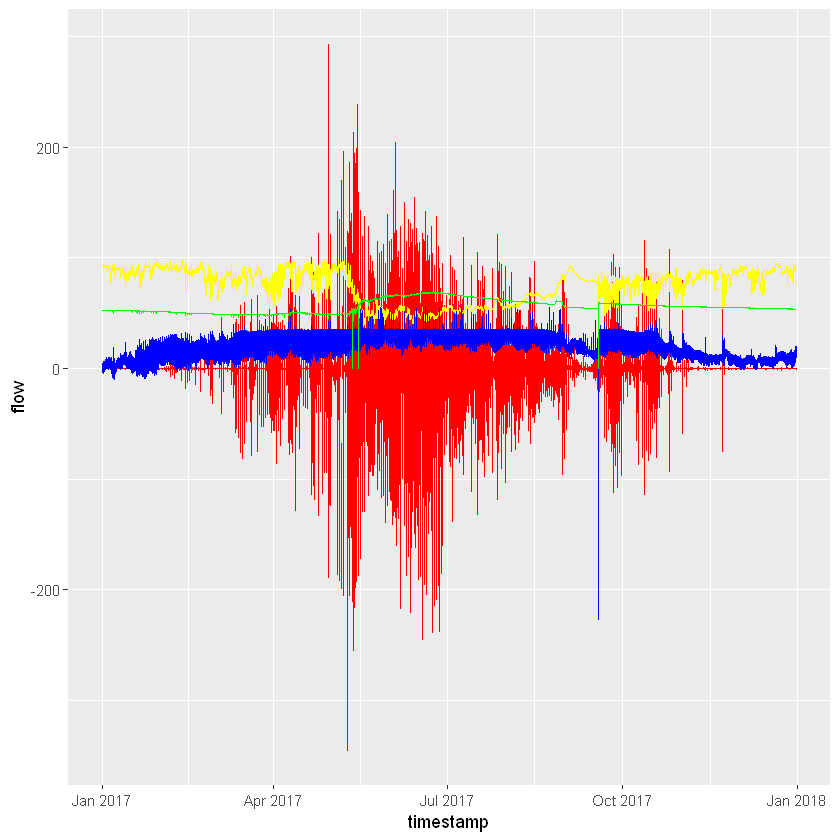

In [7]:
# line plot of all variables
plot_1 <- ggplot(merrr_data, aes(x=timestamp), xlab = "Value", ylab = "Date") +
geom_line(aes(y = flow), color = "red") +
geom_line(aes(y = humidity), color = "yellow") +
geom_line(aes(y = temperature), color = "blue") + 
geom_line(aes(y = weight), color = "green")
plot_1

List of 93
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

Warning message:
"Removed 331200 rows containing missing values (geom_point)."


List of 93
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

Warning message:
"Removed 331200 rows containing missing values (geom_point)."


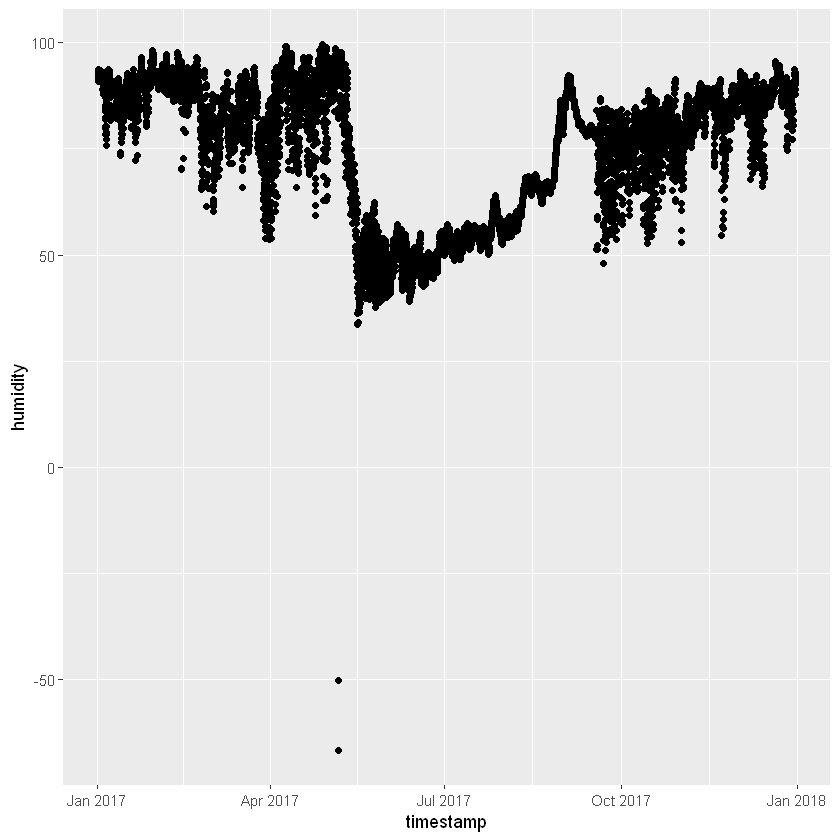

List of 93
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

Warning message:
"Removed 331200 rows containing missing values (geom_point)."


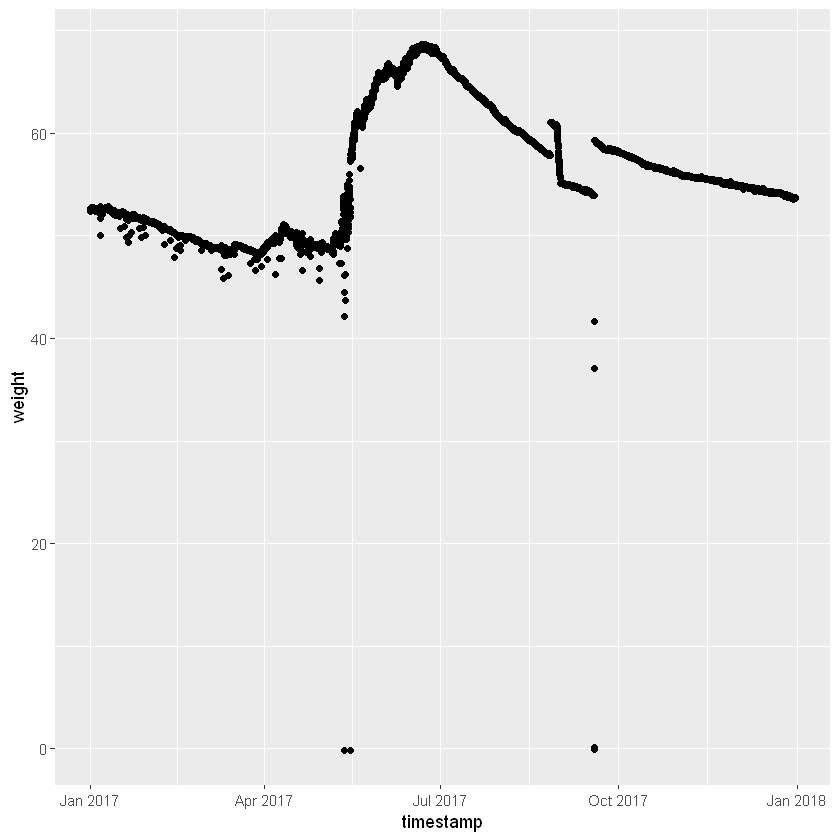

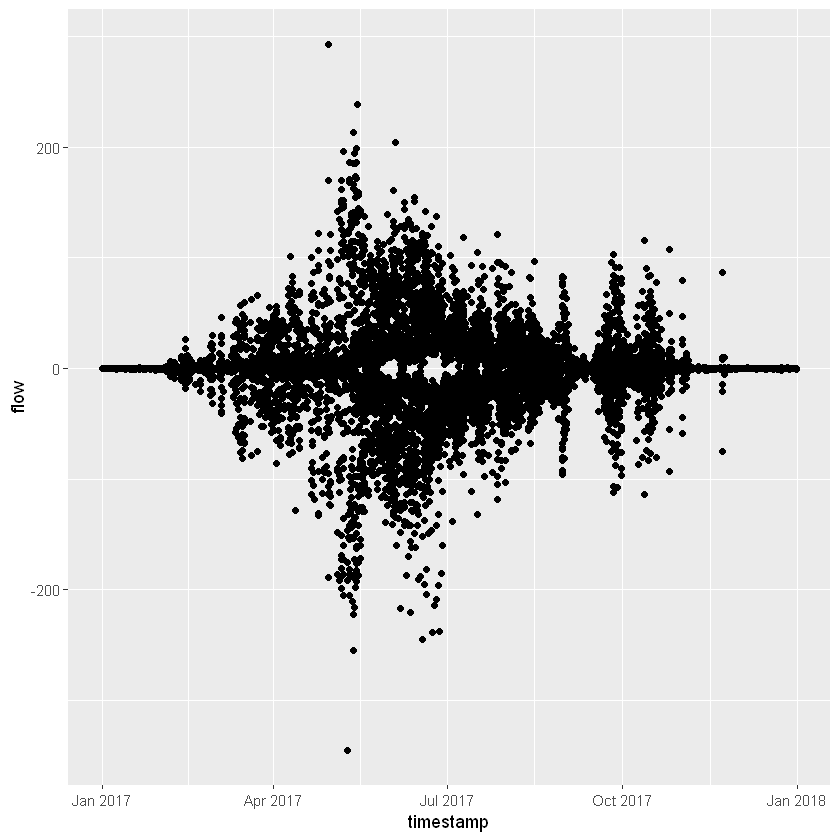

In [8]:
# Point plot of humidity, weight, flow individually
# humidity
plot_3 <- ggplot(merrr_data, aes(x = timestamp, y = humidity)) + geom_point()
theme_minimal()
plot_3

# weight
plot_4 <- ggplot(merrr_data, aes(x = timestamp, y = weight)) + geom_point()
theme_minimal()
plot_4

# flow
plot_5 <- ggplot(merrr_data, aes(x = timestamp, y = flow)) + geom_point()
theme_minimal()
plot_5

In [9]:
# max value of out flow of bees to find the time
merrr_data[which.max(merrr_data$flow),]

,timestamp,flow,humidity,temperature,weight
,<dttm>,<int>,<dbl>,<dbl>,<dbl>
73867,2017-04-29 17:00:00,293,74.184,21.034,48.8563


In [10]:
# Calculate the average of values for: weight, flow, humidity, temp for every day

# First split the timestamp column

merrr_data$Date <- as.Date(merrr_data$timestamp) #already got this one from the answers above
merrr_data$Time <- format(as.POSIXct(merrr_data$timestamp) ,format = "%H:%M:%S")
#merrr_data

In [11]:
# assigning merrr_data to this
this <- merrr_data
#this

In [12]:
# dropped the timestamp column
this$timestamp <- NULL

In [13]:
# Weight mean
this_1 <- aggregate(x = this$weight, by = list(this$Date), FUN = mean)
# this_1

In [14]:
# flow mean
this_2 <- aggregate(x = this$flow, by = list(this$Date), FUN = mean)
# this_2

In [15]:
# humidity mean
this_3 <- aggregate(x = this$humidity, by = list(this$Date), FUN = mean)
# this_3

In [16]:
# temp mean
this_4 <- aggregate(x = this$temperature, by = list(this$Date), FUN = mean)
# this_4

In [17]:
# joining weight and flow
this_fi <- merge(this_1, this_2, by = "Group.1")
#this_fi

In [18]:
# joining humidity and temp
this_fin <- merge(this_3, this_4, by = "Group.1")
#this_fin

In [19]:
# merge all
this_final <- merge(this_fi, this_fin, by = "Group.1")
#this_final
# x.x.x = weight
# x.y.x = flow
# x.x.y = humidity
# x.y.y = temp

In [22]:
# change column names of this_final

colnames(this_final) <- c("Date", "Weight", "Flow", "Humidity", "Temp")
this_final

Date,Weight,Flow,Humidity,Temp
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-01,52.63933,0.00000000,92.03692,1.1581704
2017-01-02,52.66653,0.00000000,92.74250,2.4520473
2017-01-03,52.65935,0.00000000,91.91861,4.1685171
2017-01-04,52.61066,0.00000000,90.79993,4.6701803
2017-01-05,52.61331,0.00000000,83.15413,4.1843163
2017-01-06,52.45654,0.00000000,90.63146,1.2763104
2017-01-07,52.36055,0.00000000,90.22722,-0.9790992
2017-01-08,52.63047,-0.02083333,89.48542,1.8226300
2017-01-09,52.64587,0.00000000,90.06188,4.5059549


Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not fo

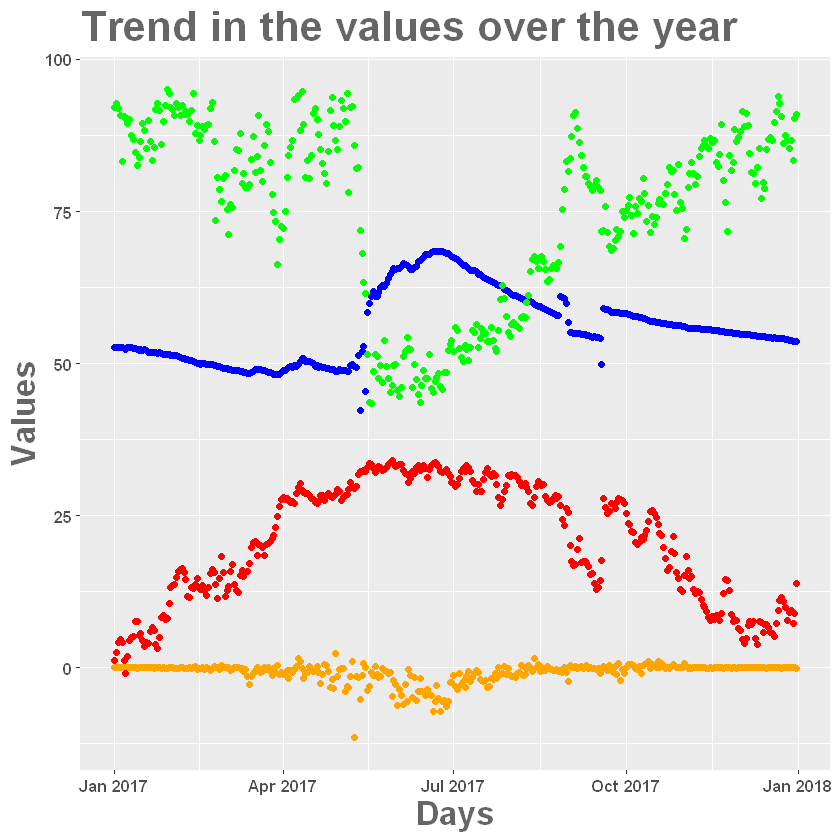

In [21]:
# plotting from this_final
plot_final <- ggplot(this_final, aes(x = Date)) +
geom_point(aes(y = Weight), color = "blue") +
geom_point(aes(y = Flow), color = "orange") +
geom_point(aes(y = Humidity), color = "green") +
geom_point(aes(y = Temp), color = "red") +
xlab("Days") + ylab("Values") +
ggtitle("Trend in the values over the year") +
theme(axis.text.y = element_text(size=10,face="bold"),      
      axis.text.x = element_text(size=10,face="bold")) +

theme(plot.title = element_text(family = "Trebuchet MS", color="#666666", 
                                face="bold", size=25, hjust=0)) +
theme(axis.title = element_text(family = "Trebuchet MS", color="#666666", 
                                  face="bold", size=20))
plot_final